In [64]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
import pandas as pd
import cufflinks as cf
import plotly.offline as plyo

In [65]:
import os
import random
import numpy as np
import pandas as pd
from pylab import mpl, plt
import pandas_datareader.data as web
data = web.DataReader('TCS.BO', 'yahoo', '2016-01-01','2022-09-30')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1658 entries, 2016-01-01 to 2022-09-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1658 non-null   float64
 1   Low        1658 non-null   float64
 2   Open       1658 non-null   float64
 3   Close      1658 non-null   float64
 4   Volume     1658 non-null   float64
 5   Adj Close  1658 non-null   float64
dtypes: float64(6)
memory usage: 90.7 KB


In [67]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,1218.175049,1206.199951,1216.050049,1208.125000,64378.0,1065.607910
2016-01-04,1208.050049,1184.525024,1208.050049,1187.750000,262498.0,1047.636597
2016-01-05,1193.175049,1171.775024,1191.500000,1175.175049,146954.0,1036.544922
2016-01-06,1192.250000,1176.099976,1182.500000,1190.599976,90250.0,1050.150513
2016-01-07,1189.849976,1179.925049,1187.500000,1185.025024,132686.0,1045.233032


In [68]:
# data.plot(figsize=(10,6))

In [69]:
data.describe().round(2)

,High,Low,Open,Close,Volume,Adj Close
count,1658.00,1658.00,1658.00,1658.00,1658.00,1658.00
mean,2174.09,2128.84,2152.84,2150.99,176829.77,2056.27
std,859.19,843.48,852.78,850.98,246753.43,884.70
min,1070.50,1027.35,1057.50,1052.53,0.00,945.23
25%,1304.93,1279.41,1290.12,1289.81,72321.75,1166.57
50%,2058.92,2011.50,2036.05,2036.12,108254.50,1912.75
75%,3047.25,2968.83,3013.26,3004.92,176676.50,2949.88
max,4045.50,3981.00,4045.50,4019.10,4395838.00,3974.71


In [70]:
data.mean().round(2)

High           2174.09
Low            2128.84
Open           2152.84
Close          2150.99
Volume       176829.77
Adj Close      2056.27
dtype: float64

In [71]:
data.diff().tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-12,36.699951,57.899902,43.550049,24.000000,-106994.0,24.000000
2022-09-13,-5.550049,-1.750000,26.149902,-11.900146,39142.0,-11.900146
2022-09-14,-121.149902,-110.250000,-125.000000,-108.549805,243235.0,-108.549805
2022-09-15,-1.350098,-13.750000,-8.000000,-16.500000,-180955.0,-16.500000
2022-09-16,-42.699951,-100.000000,-39.000000,-95.700195,160492.0,-95.700195


In [72]:
data.pct_change().round(2).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-12,0.01,0.02,0.01,0.01,-0.54,0.01
2022-09-13,-0.00,-0.00,0.01,-0.00,0.43,-0.00
2022-09-14,-0.04,-0.03,-0.04,-0.03,1.87,-0.03
2022-09-15,-0.00,-0.00,-0.00,-0.01,-0.48,-0.01
2022-09-16,-0.01,-0.03,-0.01,-0.03,0.84,-0.03


<AxesSubplot:>

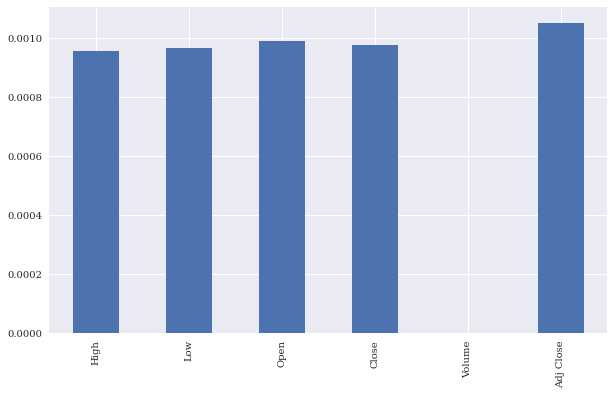

In [73]:
data.pct_change().mean().plot(kind='bar', figsize=(10,6))

In [74]:
rets = np.log(data/data.shift(1))
rets


C:\Users\NEXT\miniconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,-0.008346,-0.018133,-0.006600,-0.017009,1.405472,-0.017009
2016-01-05,-0.012390,-0.010822,-0.013795,-0.010644,-0.580124,-0.010644
2016-01-06,-0.000776,0.003684,-0.007582,0.013040,-0.487536,0.013041
2016-01-07,-0.002015,0.003247,0.004219,-0.004693,0.385402,-0.004694
...,...,...,...,...,...,...
2022-09-12,0.011291,0.018107,0.013558,0.007432,-0.778877,0.007432
2022-09-13,-0.001699,-0.000542,0.008054,-0.003678,0.358602,-0.003678
2022-09-14,-0.037833,-0.034784,-0.039098,-0.034191,1.055226,-0.034191


C:\Users\NEXT\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning:

invalid value encountered in accumulate



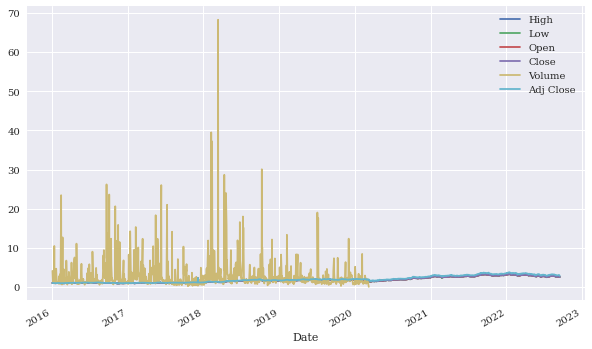

In [75]:
rets.cumsum().apply(np.exp).plot(figsize=(10,6));

In [76]:
data.resample('1w', label='right').last().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-03,1218.175049,1206.199951,1216.050049,1208.125000,64378.0,1065.607910
2016-01-10,1204.500000,1186.474976,1190.000000,1198.625000,69254.0,1057.228760
2016-01-17,1145.675049,1129.074951,1145.000000,1131.750000,175192.0,998.242920
2016-01-24,1150.500000,1130.000000,1133.000000,1147.625000,298538.0,1014.695068
2016-01-31,1199.125000,1168.050049,1169.500000,1195.599976,74230.0,1057.113525


C:\Users\NEXT\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning:

invalid value encountered in accumulate



<AxesSubplot:xlabel='Date'>

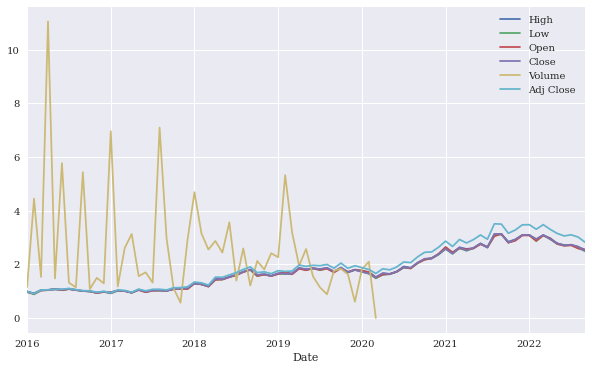

In [77]:
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(10,6))

## Rolling Statistics

In [78]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,1218.175049,1206.199951,1216.050049,1208.125000,64378.0,1065.607910
2016-01-04,1208.050049,1184.525024,1208.050049,1187.750000,262498.0,1047.636597
2016-01-05,1193.175049,1171.775024,1191.500000,1175.175049,146954.0,1036.544922
2016-01-06,1192.250000,1176.099976,1182.500000,1190.599976,90250.0,1050.150513
2016-01-07,1189.849976,1179.925049,1187.500000,1185.025024,132686.0,1045.233032
...,...,...,...,...,...,...
2022-09-12,3268.699951,3226.750000,3233.850098,3241.300049,90748.0,3241.300049
2022-09-13,3263.149902,3225.000000,3260.000000,3229.399902,129890.0,3229.399902
2022-09-14,3142.000000,3114.750000,3135.000000,3120.850098,373125.0,3120.850098


In [79]:

window = 20
data['min'] = data['Close'].rolling(window=window).min()
data['mean'] = data['Close'].rolling(window=window).mean()
data['std'] = data['Close'].rolling(window= window).std()
data['median'] = data['Close'].rolling(window=window).median()
data['max'] = data['Close'].rolling(window=window).max()
data['ewma'] = data['Close'].ewm(halflife=0.5, min_periods=window).mean()

In [80]:
data

,High,Low,Open,Close,Volume,Adj Close,min,mean,std,median,max,ewma
Date,,,,,,,,,,,,
2016-01-01,1218.175049,1206.199951,1216.050049,1208.125000,64378.0,1065.607910,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,1208.050049,1184.525024,1208.050049,1187.750000,262498.0,1047.636597,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,1193.175049,1171.775024,1191.500000,1175.175049,146954.0,1036.544922,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,1192.250000,1176.099976,1182.500000,1190.599976,90250.0,1050.150513,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,1189.849976,1179.925049,1187.500000,1185.025024,132686.0,1045.233032,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-12,3268.699951,3226.750000,3233.850098,3241.300049,90748.0,3241.300049,3128.850098,3247.037524,103.628176,3219.875000,3400.649902,3231.958795
2022-09-13,3263.149902,3225.000000,3260.000000,3229.399902,129890.0,3229.399902,3128.850098,3238.517517,97.213835,3219.875000,3400.649902,3230.039626
2022-09-14,3142.000000,3114.750000,3135.000000,3120.850098,373125.0,3120.850098,3120.850098,3224.912524,93.430073,3217.700073,3400.649902,3148.147480


<AxesSubplot:xlabel='Date'>

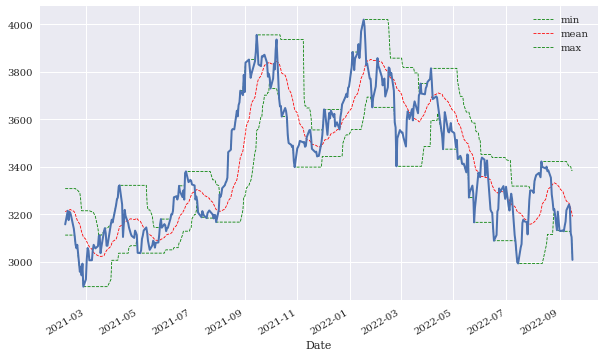

In [81]:
ax = data[['min','mean','max',]].iloc[-400:].plot(
figsize=(10,6),
style=['g--','r--','g--'],lw=0.8)
data['Close'].iloc[-400:].plot(ax=ax, lw=2.0)

In [82]:
data['SMA1'] = data['Close'].rolling(window=42).mean()
data['SMA2'] = data['Close'].rolling(window=252).mean()

In [83]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,min,mean,std,median,max,ewma,SMA1,SMA2
Date,,,,,,,,,,,,,,
2022-09-12,3268.699951,3226.75,3233.850098,3241.300049,90748.0,3241.300049,3128.850098,3247.037524,103.628176,3219.875000,3400.649902,3231.958795,3227.082159,3531.396235
2022-09-13,3263.149902,3225.00,3260.000000,3229.399902,129890.0,3229.399902,3128.850098,3238.517517,97.213835,3219.875000,3400.649902,3230.039626,3230.528588,3529.073418
2022-09-14,3142.000000,3114.75,3135.000000,3120.850098,373125.0,3120.850098,3120.850098,3224.912524,93.430073,3217.700073,3400.649902,3148.147480,3232.488113,3526.481156
2022-09-15,3140.649902,3101.00,3127.000000,3104.350098,192170.0,3104.350098,3104.350098,3210.097534,87.393962,3214.450073,3385.250000,3115.299443,3235.003592,3523.753378
2022-09-16,3097.949951,3001.00,3088.000000,3008.649902,352662.0,3008.649902,3008.649902,3191.467529,88.693092,3190.725098,3385.250000,3035.312288,3235.363113,3520.438894


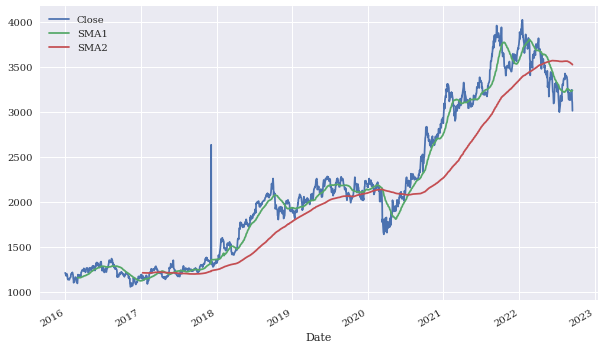

In [84]:
data[['Close','SMA1','SMA2']].plot(figsize=(10,6));

In [85]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'],1, -1
                           )

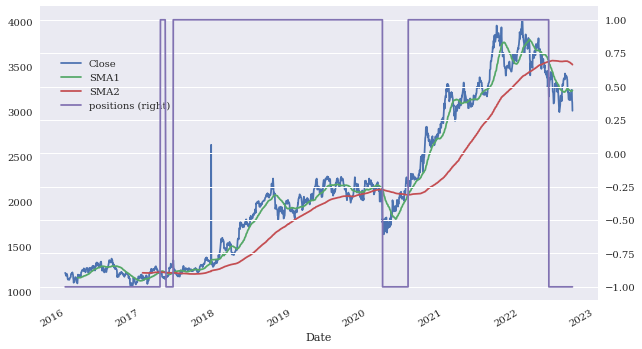

In [86]:
ax = data[['Close', 'SMA1','SMA2','positions']].plot(figsize=(10,6), secondary_y = 'positions')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

In [90]:
qf=cf.QuantFig(data, 
              title='Wipro',
              legend = 'top',
              name='Wipro')

In [103]:
plyo.iplot(
    qf.iplot(asFigure=True))

In [102]:
# qf.add_bollinger_bands(periods=15, boll_std=2)
qf.add_ema(periods=29)
qf.add_ema(periods=242)
qf.add_rsi(periods=12, showbands=True)